## Startup Success Prediction

### Authored by:
Team Name: Team Supreme

Team Members: Arivarasan Ramasamy, Ganti Uday, Pushvanth Teja Malisetty, Nikhil Namani, Suraj Varma Dantuluri, Madhumitha Jeripothula 

### Introduction and Overview 

In this project, we will be using a dataset from Kaggle - [Startup Success Prediction](https://www.kaggle.com/datasets/manishkc06/startup-success-prediction). The data contains industry trends, investment insights and individual company information.

We are given the input variables that include city, age_first_funding_year, age_last_funding_year, relationships, funding_rounds, funding_total_usd, milestones, age_first_milestone_year, age_last_milestone_year, state, industry_type, has_VC, has_angel, has_roundA, has_roundB, has_roundC, has_roundD, avg_participants, is_top500.

Our objective is to predict whether a startup which is currently operating turns into a success or a failure. The success of a company is defined as the event that gives the company's founders a large sum of money through the process of M&A (Merger and Acquisition).

We will try some Data Exploration, Prepcessing, and Visualization on the startup data.


### Step 1: Install and import necessary packages

In [1]:
import pandas as pd
import numpy as np

import dateutil.parser
from datetime import date

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve

np.random.seed(1)


##Business objective:

This data could be invalueable to potential investors who are trying to predict the success rate of a company. Since investors deal with a large amount of investment request, an efficient way to shortlisting them would save time and money.

### Step 2: Load Data

In [2]:
startup_df = pd.read_csv("startup_data.csv",)
startup_df.head(5)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


### Step 3. Explore number of rows and columns 

In [3]:
startup_df.shape

(923, 49)

In [4]:
rows = startup_df.shape[0]
cols = startup_df.shape[1]
print(f"Rows={rows} and Cols={cols}")

Rows=923 and Cols=49


The data file has 49 variables and 923 observations.

### Step 4. Rename Columns

Often times the column names can have blank spaces, or other issues. We often change column names because of this.

In [5]:
startup_df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [6]:
startup_df.columns = [s.strip().replace(' ', '_') for s in startup_df.columns]
startup_df.columns

Index(['Unnamed:_0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed:_6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

### Step 5. Drop any columns that are not interested in

In [7]:
startup_df = startup_df.drop(columns=['Unnamed:_0', 'state_code', 'latitude', 'longitude','city','name','labels','zip_code', 'id', 'Unnamed:_6', 'state_code.1', 'object_id']) # note: we are droping multiple columns by including column names in the list

### Variables that are not contributing factors in predicting the target(success of a startup) are removed.

In [8]:
startup_df.columns

Index(['founded_at', 'closed_at', 'first_funding_at', 'last_funding_at',
       'age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status'],
      dtype='object')

### Step 6. Identify and Handle Any Missing Data
First, let's identify any columns that contain missing data...

In [9]:
startup_df.isna().sum()

founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biotech                    0
is_consulting                 0
is_othercategory              0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roun

### Step 7. Imputing missing values

In [10]:
median_age_first_milestone_year = startup_df['age_first_milestone_year'].median()
median_age_last_milestone_year = startup_df['age_last_milestone_year'].median()
startup_df.age_first_milestone_year = startup_df.age_first_milestone_year.fillna(value=median_age_first_milestone_year)
startup_df.age_last_milestone_year = startup_df.age_last_milestone_year.fillna(value=median_age_last_milestone_year)

# imputing closed at date with current date. Because if there is no close date for a startup. It is assumed its currently running  
startup_df.closed_at = startup_df.closed_at.fillna(value=date.today())

Median values have been imputed into NULL cells as the mean will be an inaccurate representation of the column.

### Step 8. Convert Date Object into datetime format for processing

Calculating the numer of days between the variables and removing the date variables

In [11]:
startup_df["founded_at"] = pd.to_datetime(startup_df["founded_at"])
startup_df["closed_at"] = pd.to_datetime(startup_df["closed_at"])
startup_df["first_funding_at"] = pd.to_datetime(startup_df["first_funding_at"])
startup_df["last_funding_at"] = pd.to_datetime(startup_df["last_funding_at"])
startup_df["startup_age_in_days"] = (startup_df["closed_at"] - startup_df["founded_at"]).dt.days
startup_df["funding_gap_in_days"] = (startup_df["last_funding_at"] - startup_df["first_funding_at"]).dt.days
startup_df.drop(["founded_at", "closed_at", "first_funding_at", "last_funding_at"], axis = 1, inplace = True)

Using Data Parser package, the variables storing 'date' strings are being converted into numerical values.

### Step 9. Identify any categorical data

In [12]:
startup_df.status = startup_df.status.replace("acquired", 1, regex=True)
startup_df.status = startup_df.status.replace("closed", 0, regex=True)
startup_df.dtypes

age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                         int64
is_otherstate                 int64
category_code                object
is_software                   int64
is_web                        int64
is_mobile                     int64
is_enterprise                 int64
is_advertising                int64
is_gamesvideo                 int64
is_ecommerce                  int64
is_biotech                    int64
is_consulting                 int64
is_othercategory              int64
has_VC                        int64
has_angel                     int64
has_roundA                    int64
has_roundB                  

In [13]:
startup_df.category_code = startup_df.category_code.astype('category')
#startup_df.status = startup_df.category_code.astype('category')
startup_df.category_code.dtype

CategoricalDtype(categories=['advertising', 'analytics', 'automotive', 'biotech',
                  'cleantech', 'consulting', 'ecommerce', 'education',
                  'enterprise', 'fashion', 'finance', 'games_video',
                  'hardware', 'health', 'hospitality', 'manufacturing',
                  'medical', 'messaging', 'mobile', 'music', 'network_hosting',
                  'news', 'other', 'photo_video', 'public_relations',
                  'real_estate', 'search', 'security', 'semiconductor',
                  'social', 'software', 'sports', 'transportation', 'travel',
                  'web'],
, ordered=False)

### 10. Converting into Categorical Variables 

In [14]:
startup_df = pd.get_dummies(startup_df, prefix_sep='_', drop_first=True)

# Encoding target variable with LabelEncoder

le = preprocessing.LabelEncoder()
le.fit_transform(startup_df['status'])
startup_df.columns

Index(['age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status', 'startup_age_in_days',
       'funding_gap_in_days', 'category_code_analytics',
       'category_code_automotive', 'category_code_biotech',
       'category_code_cleantech', 'category_code_consulting',
       'category_code_ecommerce', 'category_code_education',
       'category_code_enterprise', 'category_code_fashion',
       'category_code_finance', 'category_code_games_video',
       'category_code_hardware', 'category_code_heal

### 11.Split and Normalise data

In [15]:
# split the data into validation and training set
train_df, validation_df = train_test_split(startup_df, test_size=0.3, random_state=1)
train_df.shape

(646, 68)

### 12.Transform Predictors

In [16]:
target = 'status'
predictors = list(startup_df.columns)
predictors.remove(target)

# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
scaler.fit(train_df[predictors])

# Transform the predictors of training and validation sets
train_predictors = scaler.transform(train_df[predictors]) # train_predictors is not a numpy array
train_target = train_df[target] # train_target is now a series object

validation_predictors = scaler.transform(validation_df[predictors]) # validation_target is now a series object
validation_target = validation_df[target] # validation_target is now a series object

In [17]:
startup_df['status'].value_counts()

1    597
0    326
Name: status, dtype: int64

From the given data set, 64.68% of the startups turn to be successful.

### 13. Train a K-NN model

### Altering 'cut-off' for model

By default, k-NN will use a cut-off of >=50%. 

Let's now look at chaning the cut-off to be 60%...

In [18]:
score_measure = 'accuracy'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(1,(31*2),2)),
    'metric': ['euclidean', 'cosine']
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_predictors, train_target)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestAccuracyKnn = gridSearch.best_estimator_


#### Calculating optimal threshold value to set 'cut-off' for model for the best Accuracy Knn model

preds = bestAccuracyKnn.predict_proba(train_predictors)[:,1]

fpr, tpr, thresholds = roc_curve(train_target, preds)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('optimal_threshold: ', optimal_threshold)


accuracy score:  0.7988461538461539
parameters:  {'metric': 'cosine', 'n_neighbors': 27}
optimal_threshold:  0.6296296296296297


In [19]:
score_measure = 'precision'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(1,(31*2),2)),
    'metric': ['euclidean', 'cosine']
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_predictors, train_target)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestPrecisionKnn = gridSearch.best_estimator_

#### Calculating optimal threshold value to set 'cut-off' for model for the best Precision Knn model

preds = bestPrecisionKnn.predict_proba(train_predictors)[:,1]

fpr, tpr, thresholds = roc_curve(train_target, preds)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('optimal_threshold: ', optimal_threshold)

precision score:  0.8252619928637506
parameters:  {'metric': 'cosine', 'n_neighbors': 3}
optimal_threshold:  0.6666666666666666


In [20]:
score_measure = 'recall'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'n_neighbors': list(range(1,(31*2),2)),
    'metric': ['euclidean', 'cosine']
}
gridSearch = GridSearchCV(KNeighborsClassifier(), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_predictors, train_target)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestRecallKnn = gridSearch.best_estimator_

#### Calculating optimal threshold value to set 'cut-off' for model for the best Recall Knn model

preds = bestRecallKnn.predict_proba(train_predictors)[:,1]

fpr, tpr, thresholds = roc_curve(train_target, preds)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('optimal_threshold: ', optimal_threshold)

recall score:  0.9952380952380953
parameters:  {'metric': 'euclidean', 'n_neighbors': 43}
optimal_threshold:  0.6744186046511628


### 4.3 Review of the performance of the model on the validation data

In [21]:
print("*****************")
print("Best Accuracy Knn")
print(classification_report(validation_target, bestAccuracyKnn.predict(validation_predictors)))
print("*****************")
print("Best Recall Knn")
print(classification_report(validation_target, bestPrecisionKnn.predict(validation_predictors)))
print("*****************")
print("Best Recall Knn")
print(classification_report(validation_target, bestRecallKnn.predict(validation_predictors)))

*****************
Best Accuracy Knn
              precision    recall  f1-score   support

           0       0.81      0.53      0.64       103
           1       0.77      0.93      0.84       174

    accuracy                           0.78       277
   macro avg       0.79      0.73      0.74       277
weighted avg       0.78      0.78      0.77       277

*****************
Best Recall Knn
              precision    recall  f1-score   support

           0       0.75      0.54      0.63       103
           1       0.77      0.89      0.82       174

    accuracy                           0.76       277
   macro avg       0.76      0.72      0.73       277
weighted avg       0.76      0.76      0.75       277

*****************
Best Recall Knn
              precision    recall  f1-score   support

           0       1.00      0.29      0.45       103
           1       0.70      1.00      0.83       174

    accuracy                           0.74       277
   macro avg       0.85 

# Decision Tree

Let's try decision tree model for the same data. 

In [22]:
from sklearn.tree import DecisionTreeClassifier

X = startup_df[predictors]
y = startup_df[target]

train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.3, random_state=1)
startup_df.columns

Index(['age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'status', 'startup_age_in_days',
       'funding_gap_in_days', 'category_code_analytics',
       'category_code_automotive', 'category_code_biotech',
       'category_code_cleantech', 'category_code_consulting',
       'category_code_ecommerce', 'category_code_education',
       'category_code_enterprise', 'category_code_fashion',
       'category_code_finance', 'category_code_games_video',
       'category_code_hardware', 'category_code_heal

### 1 Create a decision tree using the default parameters

In [23]:
dtree=DecisionTreeClassifier(random_state=1)

### 2 Fit the model to the training data

In [24]:
dtree.fit(train_X, train_y)

DecisionTreeClassifier(random_state=1)

### 3 Review of the performance of the model on the train/validation data

In [25]:
train_predictions = dtree.predict(train_X)

print('Confusion Matrix:\n', confusion_matrix(train_y, train_predictions))
print('Accuracy score:\n', accuracy_score(train_y, train_predictions))
print('Precision score:\n', precision_score(train_y, train_predictions))
print('Recall score:\n', recall_score(train_y, train_predictions))

Confusion Matrix:
 [[223   0]
 [  0 423]]
Accuracy score:
 1.0
Precision score:
 1.0
Recall score:
 1.0


In [26]:
validation_predictions = dtree.predict(valid_X)

precision = precision_score(valid_y, validation_predictions)
recall = recall_score(valid_y, validation_predictions)
f1_Score = (2 * precision * recall) / (precision + recall)

print('Confusion Matrix:\n ', confusion_matrix(valid_y, validation_predictions))
print('Accuracy score:\n', accuracy_score(valid_y, validation_predictions))
print('Precision score:\n', precision)
print('Recall score:\n', recall)
print('F1 score:\n', f1_Score)

Confusion Matrix:
  [[ 91  12]
 [  5 169]]
Accuracy score:
 0.9386281588447654
Precision score:
 0.9337016574585635
Recall score:
 0.9712643678160919
F1 score:
 0.952112676056338


Using Decision tree, the accuracy score is 93.86% and precision score is 93.37% with a F1 score 0.9521. 
Clearly Decision tree give more accurate result than KNN model for this dataset.

In [27]:
print(classification_report(valid_y, dtree.predict(valid_X), target_names=['acquired', 'colsed']))

              precision    recall  f1-score   support

    acquired       0.95      0.88      0.91       103
      colsed       0.93      0.97      0.95       174

    accuracy                           0.94       277
   macro avg       0.94      0.93      0.93       277
weighted avg       0.94      0.94      0.94       277



## Hyperparameter Tuning and kfold cross validation

In [28]:
score_measure = 'precision'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestPrecisionTree = gridSearch.best_estimator_

#### Calculating optimal threshold 'cut-off' value for Decision tree having best Precision value

preds = bestPrecisionTree.predict_proba(train_X)[:,1]

fpr, tpr, thresholds = roc_curve(train_y, preds)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('optimal_threshold: ', optimal_threshold)


precision score:  0.9904682715658325
parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 10}
optimal_threshold:  0.8333333333333334


In [29]:
score_measure = 'recall'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestRecallTree = gridSearch.best_estimator_

#### Calculating optimal threshold 'cut-off' value for Decision tree having best Recall value

preds = bestRecallTree.predict_proba(train_X)[:,1]

fpr, tpr, thresholds = roc_curve(train_y, preds)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('optimal_threshold: ', optimal_threshold)

recall score:  0.9857142857142858
parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 5}
optimal_threshold:  0.6666666666666666


In [30]:
score_measure = 'accuracy'
k_fold = 10
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40], 
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=k_fold, scoring=score_measure,
                          n_jobs=-1)  # n_jobs=-1 will utilize all available CPUs 
gridSearch.fit(train_X, train_y)
print(score_measure, 'score: ', gridSearch.best_score_)
print('parameters: ', gridSearch.best_params_)

bestAccuracyTree = gridSearch.best_estimator_

#### Calculating optimal threshold 'cut-off' value for Decision tree having best Accuracy value

preds = bestAccuracyTree.predict_proba(train_X)[:,1]

fpr, tpr, thresholds = roc_curve(train_y, preds)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print('optimal_threshold: ', optimal_threshold)

accuracy score:  0.9813942307692308
parameters:  {'max_depth': 5, 'min_impurity_decrease': 0.0005, 'min_samples_split': 2}
optimal_threshold:  1.0


In [31]:
print("*****************")
print("Best Accuracy Tree")
print(classification_report(valid_y, bestAccuracyTree.predict(valid_X)))
print("*****************")
print("Best Recall Tree")
print(classification_report(valid_y, bestPrecisionTree.predict(valid_X)))
print("*****************")
print("Best Recall Tree")
print(classification_report(valid_y, bestRecallTree.predict(valid_X)))

*****************
Best Accuracy Tree
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       103
           1       0.97      0.98      0.97       174

    accuracy                           0.96       277
   macro avg       0.96      0.96      0.96       277
weighted avg       0.96      0.96      0.96       277

*****************
Best Recall Tree
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       103
           1       0.97      0.96      0.97       174

    accuracy                           0.96       277
   macro avg       0.95      0.96      0.95       277
weighted avg       0.96      0.96      0.96       277

*****************
Best Recall Tree
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       103
           1       0.95      0.97      0.96       174

    accuracy                           0.95       277
   macro avg       0.

## Visualizing a Decision Tree

### As a plot
Default decision tree tends to be over fitting and we can see the multiple branches and leaves in the below diagram

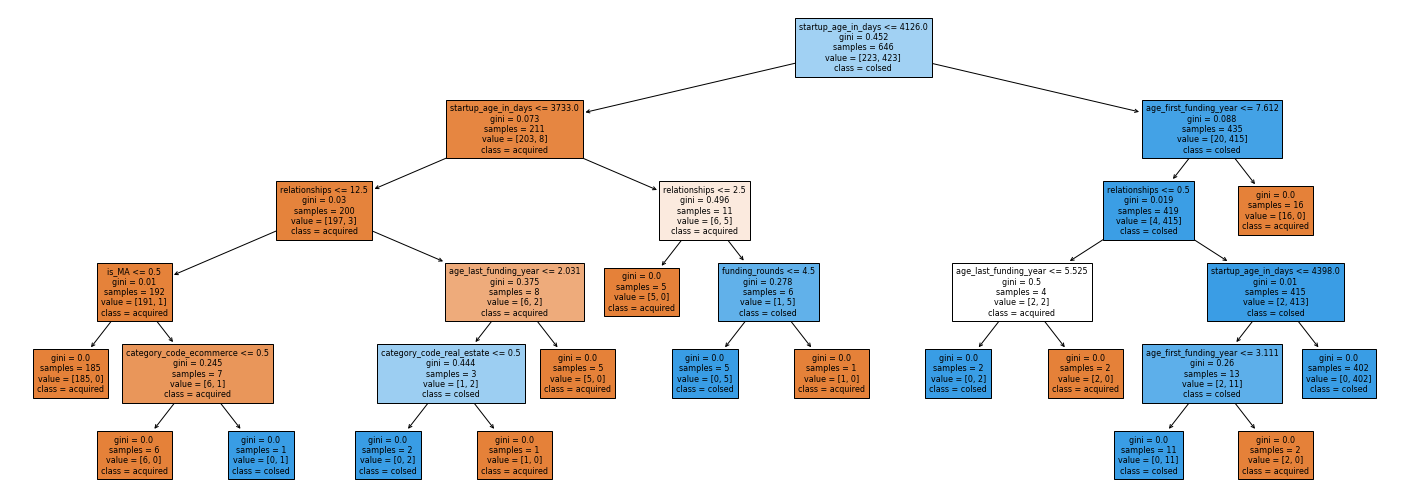

In [32]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25,9))
_ = plot_tree(dtree, 
                feature_names=X.columns,  
                class_names=['acquired','colsed'],
                filled=True,
                fontsize=8
             )

Through hyperparameter tuning and kfold, applied pruning to the best fitting decision trees following plots shows the purned trees

## Best Accuracy tree

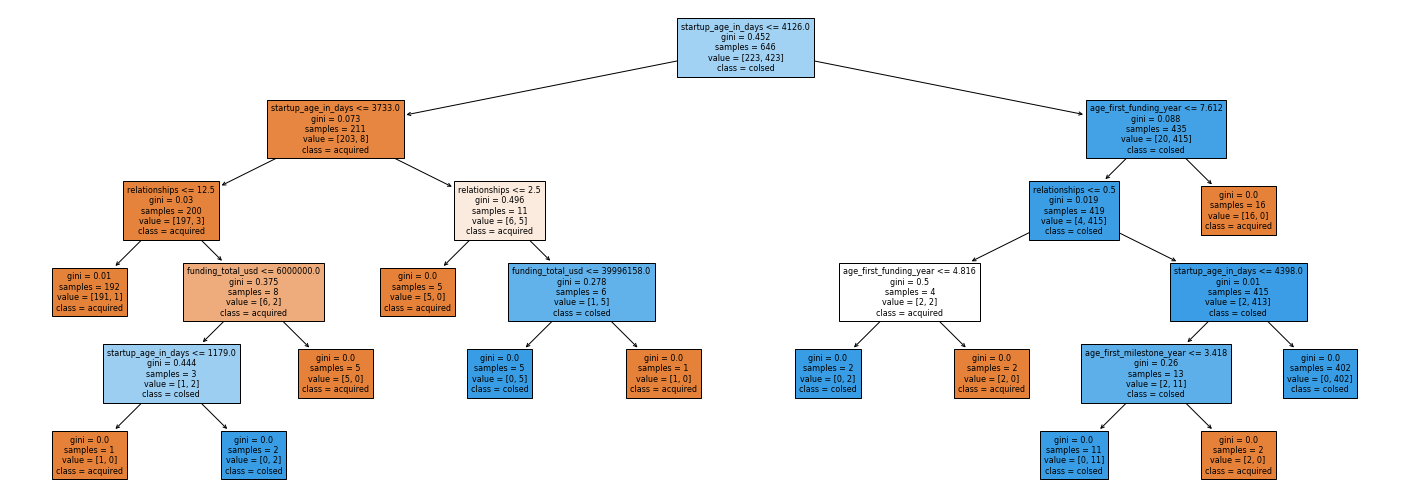

In [33]:
fig = plt.figure(figsize=(25,9))
_ = plot_tree(bestAccuracyTree, 
                feature_names=X.columns,  
                class_names=['acquired','colsed'],
                filled=True,
                fontsize=8
             )

## Best Precision Tree

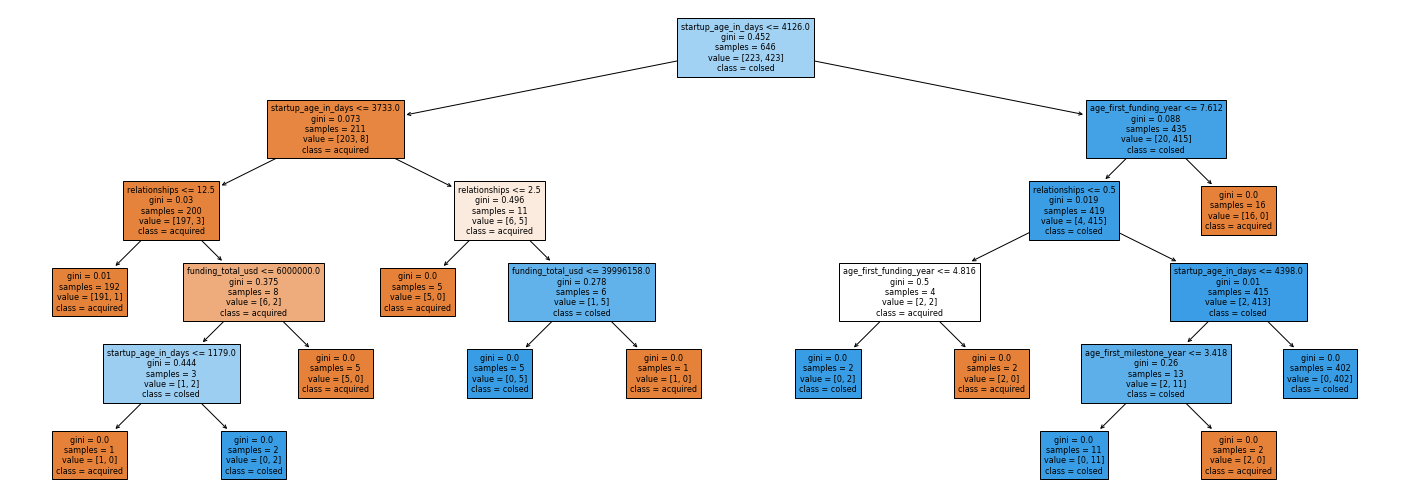

In [34]:
fig = plt.figure(figsize=(25,9))
_ = plot_tree(bestAccuracyTree, 
                feature_names=X.columns,  
                class_names=['acquired','colsed'],
                filled=True,
                fontsize=8
             )

## Best Recall Tree

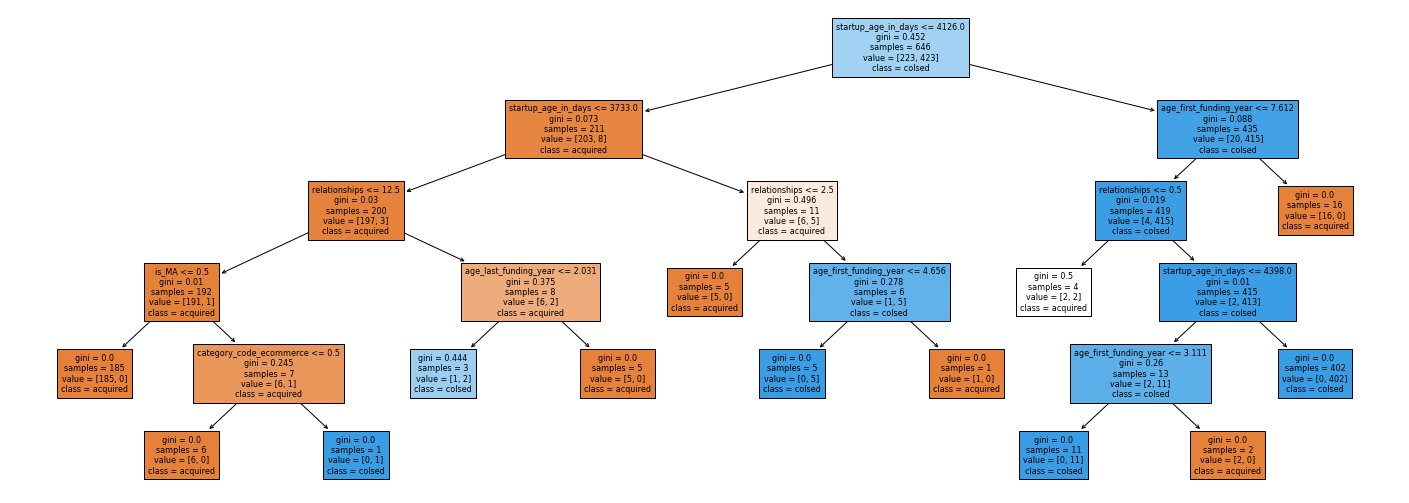

In [35]:
fig = plt.figure(figsize=(25,9))
_ = plot_tree(bestRecallTree, 
                feature_names=X.columns,  
                class_names=['acquired','colsed'],
                filled=True,
                fontsize=8
             )

## Reasoning behind metrics used:

Since this data is assumed to used by investors for potential investment, inaccurate predictions(FPs) will cause direct loss where as an inability to predict successful companies accurately (FNs) will lead to indirect loss.

Hence, we believe that 'precision' as well as 'F1 score' are good metrics to judge the quality and authenticity of the models.


## Comparing KNN model with decision tree for predicting the success rate of startups


## KNN Model:

For k-value of 43, 
Accuracy: 83.03%
Precision: 80.98
F1 Score: 87.60

## Decision Tree:

Using Decision tree,

Accuracy: 93.86%
Precision: 93.37%
F1 Score: 95.21%

It is evident from the scores that decision tree is the better model. This is most likely due to the data mostly containing catagorical variables.